In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()
df.shape

(768, 9)

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df["Outcome"].value_counts()
#1 is db 0 is not db

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [6]:
x = df.drop(["Outcome"],axis=1)
y = df["Outcome"]

In [7]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(x)

StandardScaler()

In [10]:
std = scaler.transform(x)

In [11]:
std

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [12]:
x = std

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=101)

## MODEL

In [14]:
classifier = svm.SVC(kernel="linear")

In [15]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

## ACCURACY

In [16]:
train_prediction = classifier.predict(x_train)
train_accuracy = accuracy_score(train_prediction,y_train)
train_accuracy*100

77.85016286644951

In [17]:
test_prediction = classifier.predict(x_test)
test_accuracy = accuracy_score(test_prediction,y_test)
test_accuracy*100

77.27272727272727

In [18]:
cf = confusion_matrix(y_test,test_prediction)

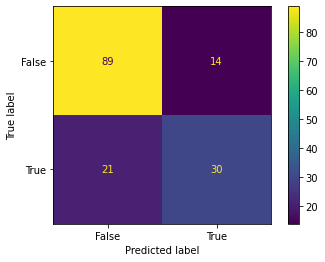

In [19]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])
cm_display.plot()
plt.show()

## HYPERPARAMETER TUNING

1.CHECKING KERNELS

In [24]:
kernel = ['linear','rbf','poly','sigmoid']
for i in kernel:
    model = svm.SVC(kernel=i,C=1) #C is penalty for error, encourages model to not make errors
    model.fit(x_train,y_train)
    print("Model: ",i,"|| Accuracy: ",model.score(x_test,y_test))

Model:  linear || Accuracy:  0.7727272727272727
Model:  rbf || Accuracy:  0.7987012987012987
Model:  poly || Accuracy:  0.7532467532467533
Model:  sigmoid || Accuracy:  0.7207792207792207


2.CHECKING DEGREES

In [37]:
for i in range(1,11):
    model = svm.SVC(kernel='linear',degree=i,C=50)
    model.fit(x_train,y_train)
    print("Degree: ",i,"|| Accuracy: ",model.score(x_test,y_test))


Degree:  1 || Accuracy:  0.7857142857142857
Degree:  2 || Accuracy:  0.7857142857142857
Degree:  3 || Accuracy:  0.7857142857142857
Degree:  4 || Accuracy:  0.7857142857142857
Degree:  5 || Accuracy:  0.7857142857142857
Degree:  6 || Accuracy:  0.7857142857142857
Degree:  7 || Accuracy:  0.7857142857142857
Degree:  8 || Accuracy:  0.7857142857142857
Degree:  9 || Accuracy:  0.7857142857142857
Degree:  10 || Accuracy:  0.7857142857142857


## GRIDSEARCH CV to check different params

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
params = {'C':[0.1,1,100],'kernel':['linear','rbf','poly','sigmoid'],'degree':[1,2,3,4,5,6] }
#dict of params and their values we want to check

In [40]:
grid = GridSearchCV(svm.SVC(),params)
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [41]:
print(grid.best_params_)
print(grid.score(x_test,y_test))

{'C': 100, 'degree': 1, 'kernel': 'poly'}
0.7857142857142857
